【問題1】ダーツのまとを選ぶ
ダーツのまとを選ぶためにサイコロを実装しましょう。

《ヒント》

「サイコロを振る」動作を表現するのにnp.random.choice()を用います。こうすることで配列の中からランダムに要素を1つ選ぶことができます。

In [4]:
import numpy as np

from collections import Counter

dice = list(range(1, 7))
result = np.random.choice(dice)
print(result)

4


【問題2】ダーツを投げて、刺さった場所を記録する
ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。正規分布のx方向の「中心」は問題1で出たサイコロの番号、「標準偏差」は0.1としてください。 刺さった場所（座標）は、配列で保持するようにしてください。

《ヒント》

ダーツが刺さった場所（座標）は、二次元正規分布を真上から見たときのx座標、y座標の交点として表現しましょう。x座標、y座標の各値は、それぞれが独立した一次元正規分布に従うものとし、x座標とy座標用に、別々にnp.random.normal()から変数を発生させ、それらの組みを座標点として、配列で保持してください。

また、二次元正規分布はnp.random.multivariate_normal()を用いて表現することもできます。その場合、例えば平均値ベクトルを[0,0] (mean=[0,0])、共分散行列を[[[0.01,0],[0,0.01]] (cov=[[0.01,0],[0,0.01]])としてnp.random.multivariate_normal(mean, cov)とすると、x座標とy座標の変数の組みを作れます。

【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する
ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。ディクショナリのkeyはダーツのまとの番号になります。

《ヒント》

「ダーツを1000回投げる」というのは 問題1のサイコロを1000回振る　ことに相当します。 問題1と問題2に加えディクショナリに座標を格納する操作をfor文の中に実装することになります

【問題4】ダーツのまとと刺さった位置を描画する
問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください。

matplotlibのpatchesクラスの公式ドキュメント

matplotlib.patches.Circle — Matplotlib 3.1.1 documentation

Mmh Donuts!!! — Matplotlib 3.1.1 documentation

ここまで出来ていれば、最初に示したような図が描画されるはずです。

In [13]:
import numpy as np
from collections import Counter

dice = list(range(1, 7))

cov = 0.1
listx= []
listy= []


for _ in range(1000):
    dice_number = np.random.choice(dice)
    
    x = np.random.normal(dice_number, cov)
    listx.append(x)
    #dictx[dice_number] = dictx[dice_number].append(x)

    y = np.random.normal(0, cov)
    listy.append(y)
    #dicty[dice_number] = dicty[dice_number].append(y)

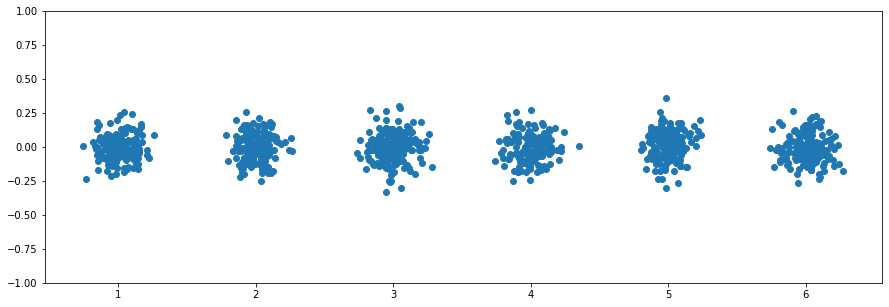

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
fig = plt.figure(figsize = (15,5))

plt.scatter(listx, listy)
plt.ylim(-1, 1)
plt.show()

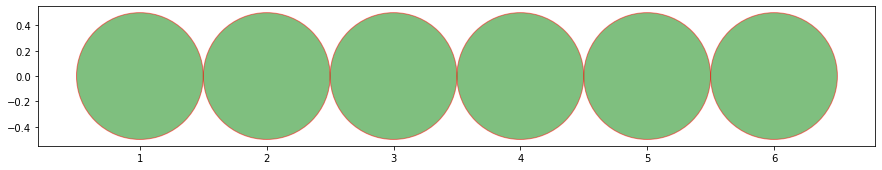

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure(figsize = (15,15))
ax = plt.axes()


for i in range(1, 7):
    c = patches.Circle(xy=(i, 0), radius=0.5, fc='g', ec='r', alpha = 0.5)
    ax.add_patch(c)


plt.axis('scaled')
ax.set_aspect('equal')


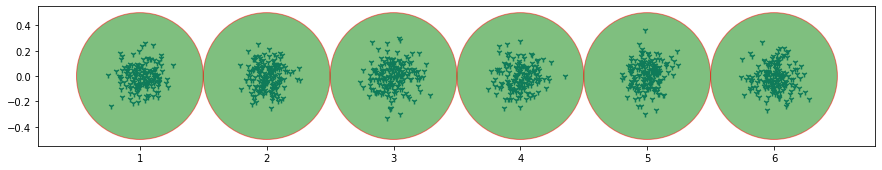

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure(figsize = (15,5))
ax = plt.axes()

for i in range(1, 7):
    c = patches.Circle(xy=(i, 0), radius=0.5, fc='g', ec='r', alpha = 0.5)
    ax.add_patch(c)


plt.axis('scaled')
ax.set_aspect('equal')
plt.scatter(listx, listy, marker = '1')
plt.show()

In [23]:
import numpy as np
from collections import Counter
from collections import defaultdict

dice_dict_x = defaultdict(list)
dice_dict_y = defaultdict(list)

dice = list(range(1, 7))
cov = 0.1


for _ in range(1000):
    dice_number = np.random.choice(dice)
    x = np.random.normal(dice_number, cov)
    dice_dict_x[dice_number].append(x)
    
    #dictx[dice_number] = dictx[dice_number].append(x)

    y = np.random.normal(0, cov)
    dice_dict_y[dice_number].append(y)
    
   
    #dicty[dice_number] = dicty[dice_number].append(y)

In [24]:
dice_dict_x

defaultdict(list,
            {1: [0.8132872892540564,
              0.8565189457774032,
              0.9736318613219896,
              0.8746647710968609,
              0.8722498573579657,
              0.9865523623563264,
              1.119896225120853,
              0.9279395564829648,
              0.9326484925469308,
              1.0981783268450227,
              1.1370313230799591,
              0.9179910166587179,
              1.0750316728521854,
              0.8272754449596486,
              0.8005241266393825,
              1.0638806957885394,
              0.914476895889894,
              0.8363093543082313,
              1.070225805199164,
              1.0104972912147503,
              1.2167965875457354,
              1.2161365672150546,
              0.7147095715172697,
              0.9015556270829973,
              1.0649125792018772,
              0.9107830435134712,
              0.8847366740951096,
              1.1159118480999721,
              0.96675474690417

In [25]:
dice_dict_y

defaultdict(list,
            {1: [-0.08879860028762304,
              -0.02739144669795387,
              0.1283667331921534,
              -0.00917944913698943,
              0.19059836556473042,
              -0.012516486480317685,
              0.02753205233020833,
              0.07203505680310439,
              0.06555230009767829,
              0.11059148240182673,
              0.050338532953056236,
              -0.20059465198444945,
              -0.048168144044823,
              -0.06464455844138155,
              -0.0638465746330893,
              0.10909417686079598,
              0.08669517459010445,
              0.14423658551807192,
              -0.028352860611656636,
              0.032446023089911076,
              -0.05354892444111569,
              0.08702429773244603,
              0.16308562920966863,
              -0.02335352819748288,
              -0.07632204206188194,
              -0.134012150155021,
              -0.03154550711963437,
              0.073191

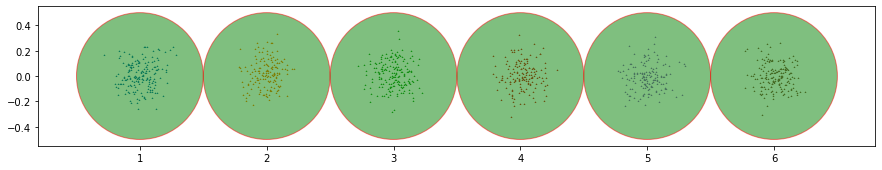

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure(figsize = (15,5))
ax = plt.axes()

for i in range(1, 7):
    c = patches.Circle(xy=(i, 0), radius=0.5, fc='g', ec='r', alpha = 0.5)
    ax.add_patch(c)
    plt.scatter(dice_dict_x[i], dice_dict_y[i],  listy, marker = '1')

plt.axis('scaled')
ax.set_aspect('equal')
plt.show()

【問題5】関数化
ダーツを投げる回数、ダーツのまとの数が変わっても描画できるように、問題1~問題4で作成したコードを関数化しましょう。

《ヒント》

ダーツの投げる回数とダーツのまとの数を関数の引数にしましょう。

In [31]:
def doots(number_of_throw, number_of_object):
    
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    import numpy as np
    from collections import Counter
    from collections import defaultdict

    dice_dict_x = defaultdict(list)
    dice_dict_y = defaultdict(list)

    dice = list(range(1, number_of_object+1))
    cov = 0.1


    for _ in range(number_of_throw):
        dice_number = np.random.choice(dice)
        x = np.random.normal(dice_number, cov)
        dice_dict_x[dice_number].append(x)

        y = np.random.normal(0, cov)
        dice_dict_y[dice_number].append(y)

    fig = plt.figure(figsize = (15,5))
    ax = plt.axes()

    for i in range(1, number_of_object+1):
        c = patches.Circle(xy=(i, 0), radius=0.5, fc='g', ec='r', alpha = 0.5)
        ax.add_patch(c)
        plt.scatter(dice_dict_x[i], dice_dict_y[i],  listy, marker = '1')

    plt.axis('scaled')
    ax.set_aspect('equal')
    plt.show()


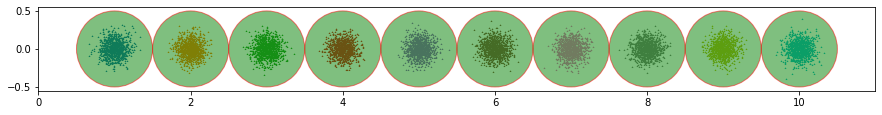

In [33]:
doots(10000, 10)